In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram
%matplotlib inline

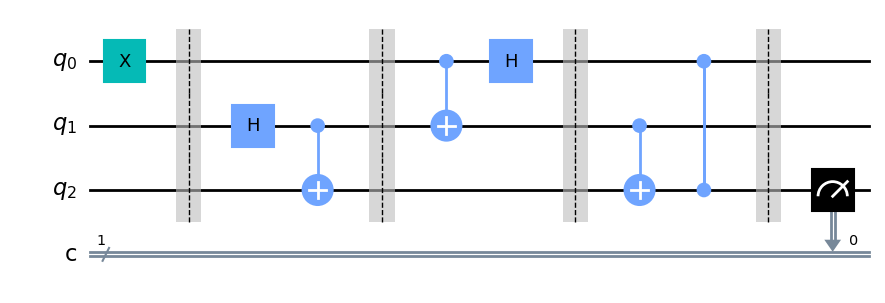

In [2]:
# quantum teleportation circuit using deferred measurement
circuit = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit.x(0)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

# apply conditional operations on Barron's qubit
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.barrier()

# measure Barron's destination qubit
circuit.measure(2, 0)

circuit.draw(output='mpl')

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.tools.monitor import job_monitor
IBMQ.save_account('f848e1c8684e40f65a4b8fa6c8bd584c164a72a791fa19023155fac64c812b074e8a40663f3616cd0bc646d85b19634fef25966a30fe1d09fc53448d8d1d8c7d')
provider = IBMQ.load_account()

/var/folders/_y/gpx6st7s77963mn1x58nrsf00000gn/T/ipykernel_29212/1518368705.py:3: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account('f848e1c8684e40f65a4b8fa6c8bd584c164a72a791fa19023155fac64c812b074e8a40663f3616cd0bc646d85b19634fef25966a30fe1d09fc53448d8d1d8c7d')
/var/folders/_y/gpx6st7s77963mn1x58nrsf00000gn/T/ipykernel_29212/1518368705.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with '

In [4]:
qcomp = provider.get_backend('ibmq_qasm_simulator')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


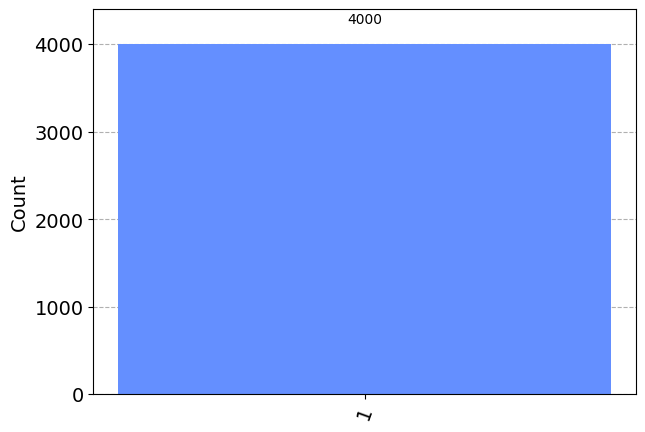

In [5]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())

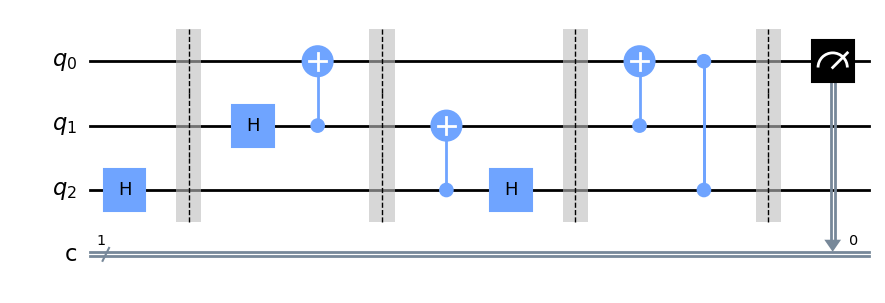

In [9]:
# quantum teleportation circuit using deferred measurement
circuit = QuantumCircuit(3, 1)

# initialize Olivia's qubit (quantum state to teleport)
circuit.h(2)
circuit.barrier()

# create Bell state pair
circuit.h(1)
circuit.cx(1, 0)
circuit.barrier()

# Olivia performs Bell state measurement
circuit.cx(2, 1)
circuit.h(2)
circuit.barrier()

# apply conditional operations on Barron's qubit
circuit.cx(1, 0)
circuit.cz(2, 0)
circuit.barrier()

# measure Barron's destination qubit
circuit.measure(0, 0)

circuit.draw(output='mpl')

In [10]:
qcomp = provider.get_backend('ibm_perth')
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


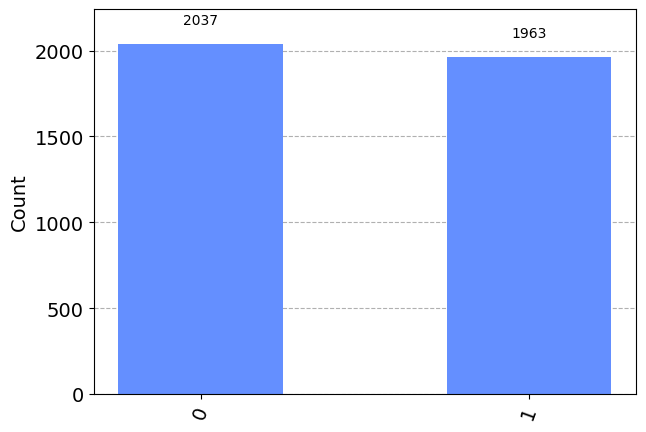

In [11]:
qcomp_result = job.result()
plot_histogram(qcomp_result.get_counts())